# Intro to Data Science | Machine Learning Behind Instagram & TikTok Filters

---

<center><img src="banner.jpeg" width="600px"/></center>

Erin Hoffman, Data Science Curriculum Developer at Flatiron School

May 25, 2022

https://github.com/learn-co-curriculum/dsc-kmeans-color-palette

## Agenda

1. Images as Data
2. Machine Learning Taxonomy of Instagram & TikTok Filters
3. K-Means Clustering
4. Python Code for Machine Learning

## 1. Images as Data

### Data

Some results from a Wikimedia Commons search for "data":

<div>
    <div style="width: 50%; float: left;"><a title="Ferd1508, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:SEK2_Bild_1.png"><img width="512" alt="SEK2 Bild 1" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/SEK2_Bild_1.png/512px-SEK2_Bild_1.png"></a></div>
    <div style="width: 50%; float: left;"><a title="PIX1861, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Chart-g38b45fc3e_1920.jpg"><img width="512" alt="Chart-g38b45fc3e 1920" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Chart-g38b45fc3e_1920.jpg/512px-Chart-g38b45fc3e_1920.jpg"></a></div>
</div>

**DS vocabulary word:** tabular data

### Tabular Data in Python

One of the most common formats for tabular data is CSV. You can read more about it [here](https://github.com/learn-co-curriculum/dsc-csv).

In [1]:
with open("track_times.csv") as f:
    for line in f:
        print(line)

13.1,13.59,13.44

13.93,13.85,13.47

14.12,14.41,13.89

14.42,13.55,13.43


In [3]:
import pandas as pd
pd.read_csv("track_times.csv", header=None)

,0,1,2
0,13.10,13.59,13.44
1,13.93,13.85,13.47
2,14.12,14.41,13.89
3,14.42,13.55,13.43


### Beyond Tabular Data

On the computer's hard drive, all data is stored as binary. This includes images!

<a title="Graph+sas, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Binary-code.png"><img width="1024" alt="Binary-code" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Binary-code.png/1024px-Binary-code.png"></a>

### Image Data in Python

In [1]:
with open("banner.jpeg", "rb") as f:
    for line in f:
        print(line)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x02\x00%\x00%\x00\x00\xff\xdb\x00\x84\x00\x06\x04\x04\x05\x04\x04\x06\x05\x05\x05\x06\x06\x06\x07\t\x0e\t\t\x08\x08\t\x12\r\r\n'
b'\x0e\x15\x12\x16\x16\x15\x12\x14\x14\x17\x1a!\x1c\x17\x18\x1f\x19\x14\x14\x1d\'\x1d\x1f"#%%%\x16\x1c),($+!$%$\x01\x06\x06\x06\t\x08\t\x11\t\t\x11$\x18\x14\x18$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\xff\xc2\x00\x11\x08\x03\x84\x07\x08\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x005\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xf4O\x8d\xb64\xc1\xba\xf0\x0f\xb1\xaf6\xfa0\x00\x00\x03w\xcf\x1e\xe5\xf2\xb9\xf4|\xb3i1\xa3\x01\x88j\x00\xc2\x1c\x03\x18\x0c`\x80\xc0\x90\x86\x05e\x14\x02\xbaq\x11\xd8\xd6$\xa2h\x0cp\x13$ \x00\x18\xc0C\x00\x86\x14\x84H\xb7&UdF\x14@: \xa7\x00\x00\xc0\x00\x00\x06\x10\x0

In [2]:
bin(int("ff", base=16))

'0b11111111'

In [3]:
bin(int("d8", base=16))

'0b11011000'

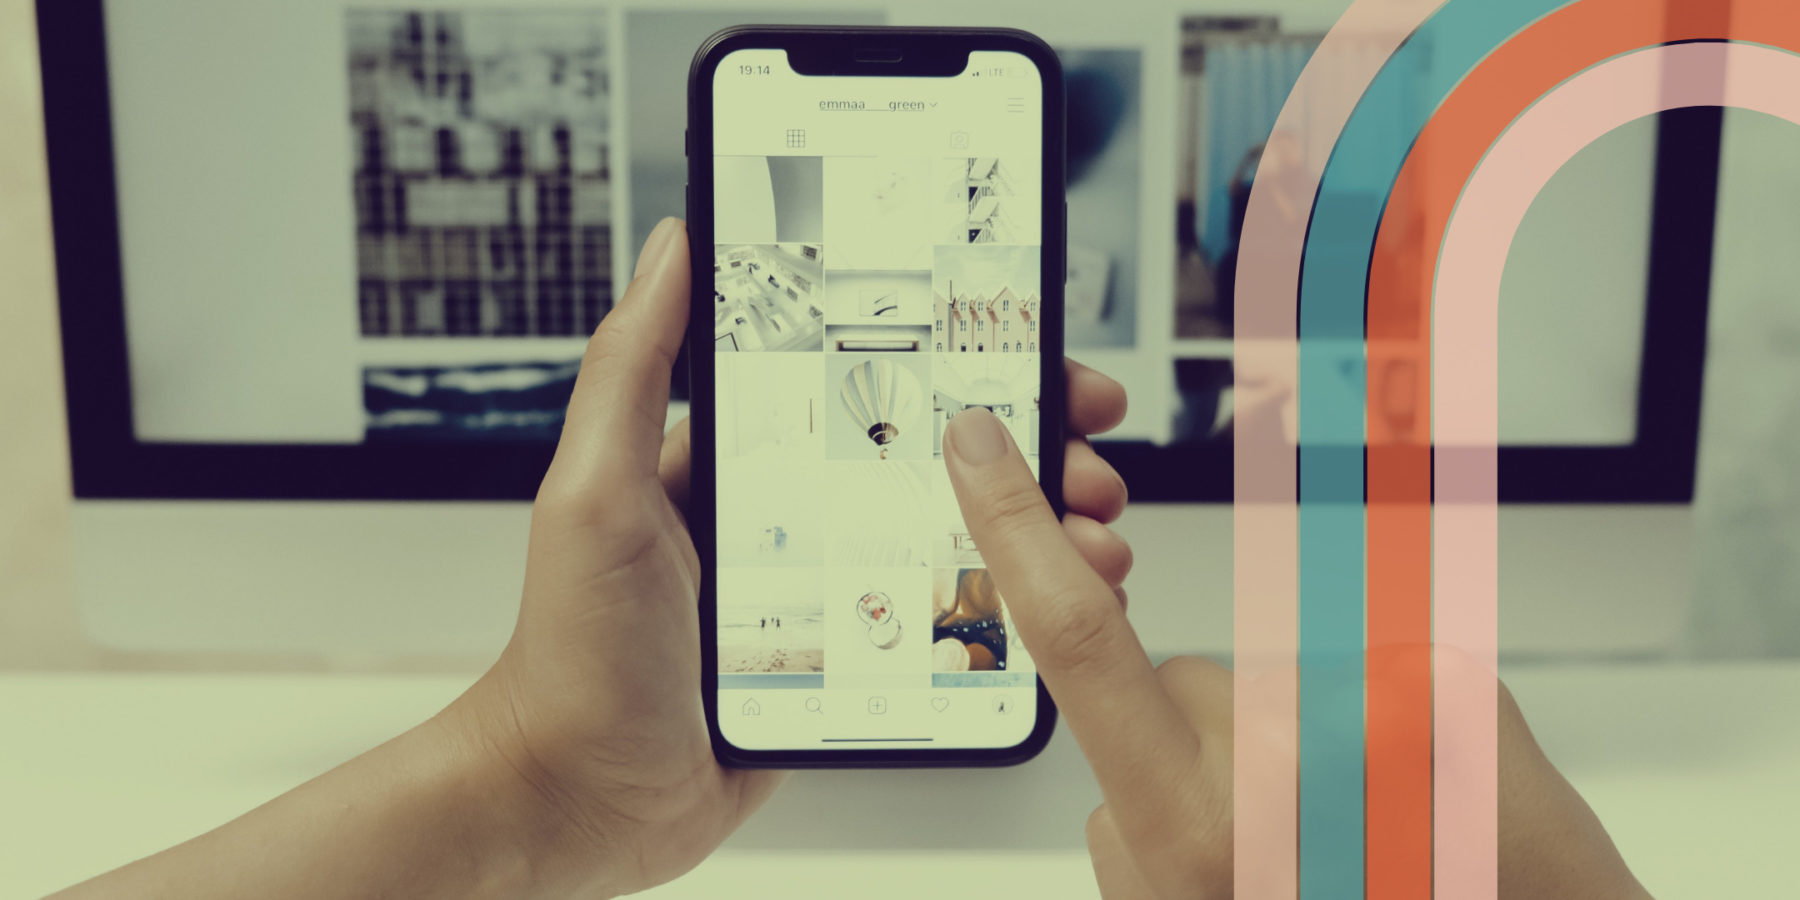

In [4]:
from PIL import Image

image = Image.open("banner.jpeg")
display(image)

## 2. Machine Learning Taxonomy of Instagram & TikTok Filters

### Supervised vs. Unsupervised Learning

**Supervised** machine learning is the more well-known kind of machine learning. It includes classification and regression tasks. Supervised ML learns from labeled "ground truth" training data in order to make predictions about unknown or future data.

**Unsupervised** machine learning learns patterns from the data without any labeled "ground truth" training data. The main types of unsupervised ML are clustering, dimensionality reduction, and anomaly detection.

### Supervised ML Filters

(Note: I'm using "filters" and "effects" interchangeably here)

<div>
    <div style="width: 25%; float: left; padding: 20px"><img src="https://backlightblog.com/images/2020/10/sunglasses-Instagram-effect-2.png" /></div>
    <div style="width: 75%; float: left; padding: 20px"><img src="https://blog.iconosquare.com/wp-content/uploads/2020/11/PhotoGrid_Plus_1605093798881-500x500.jpg" /></div>
</div>

### Unsupervised ML Filters

<div>
    <div style="width: 66%; float: left;"><img src="https://www.lifewire.com/thmb/L-bT8MOm8iQM0w8US1QUXt5G_qc=/650x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/the-best-instagram-filters-for-2018-4177148-2-5bc680ab46e0fb00516cd6d3.jpg" /></div>
    <div style="width: 33%; float: left;"><img src="nadiia_moore.png" /></div>
</div>



### So Are You Teaching Us How to Make Instagram Filters?

No, that is more of a design/graphics skill set. After the workshop you can definitely check out the software at these links for making Facebook/Instagram and TikTok filters respectively:

* https://sparkar.facebook.com/ar-studio/
* https://effecthouse.tiktok.com/

Instead we are going to talk about an algorithm that makes a particular filter work: **k-means clustering**

Credit to Kate Compton for inspiration

https://twitter.com/GalaxyKate/status/1462258497702313985/photo/1

workspace.jpg

Photo by <a href="https://unsplash.com/@leecampbell?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Lee  Campbell</a> on <a href="https://unsplash.com/s/photos/web-design?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

monitors.jpg

Photo by <a href="https://unsplash.com/@euwars?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Farzad Nazifi</a> on <a href="https://unsplash.com/s/photos/web-design?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
neon.jpg

Photo by <a href="https://unsplash.com/@joesvalentine?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Joes Valentine</a> on <a href="https://unsplash.com/s/photos/web-design?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

blue_orange.jpg

Photo by <a href="https://unsplash.com/@davisuko?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">davisuko</a> on <a href="https://unsplash.com/s/photos/web-design?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

mountain_cabin.jpg

Photo by <a href="https://unsplash.com/@eberhardgross?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">eberhard 🖐 grossgasteiger</a> on <a href="https://unsplash.com/t/wallpapers?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

Sunglasses Instagram filter

https://backlightblog.com/instagram-filters-effects

Greenscreen TikTok filter

https://blog.iconosquare.com/the-15-tiktok-filters-and-effects-you-want-to-use/

Clarendon Instagram filter

https://www.lifewire.com/best-instagram-filters-4177148

Color Palette Instagram filter

https://youtu.be/cIKEYNJl97c

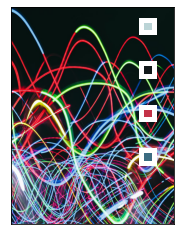

In [6]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load in all pixels in image
im = Image.open("neon.jpg")
pixels = np.array(im.getdata())

# Fit a k-means model on the pixel data
cluster_count = 4
kmeans = KMeans(n_clusters=cluster_count, random_state=0).fit(pixels)
    
# The image colors were originally represented as RGB with ranges
# from 0 to 255. The Rectangle class is expecting them to range
# from 0 to 1, so divide them all by 255
palette = kmeans.cluster_centers_ / 255

# Set up a Matplotlib figure to display the image and swatches
fig, ax = plt.subplots()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Display the image
ax.imshow(im)

# Display the swatches
patch_width = 50
patch_height = 50

image_width = im.width
image_height = im.height

for index, color in enumerate(palette):
    ax.add_patch(Rectangle(
        (int(image_width * 0.8), int(image_height * 0.8 / cluster_count * index) + patch_height), # xy position of patch
        patch_width,
        patch_height,
        facecolor=color, # color in the rectangle with the palette color
        edgecolor="white", # white border to add contrast
        linewidth=5
    ))